In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick



In [2]:
# capital budgeting techniques
# and NPV profiles
CashFlows = np.ndarray[float]


def npv(cf: CashFlows, discount: float):
    total = 0
    for i, cash in enumerate(cf):
        total += cash / (1+discount) ** i

    return total


def npv_profile(cf: CashFlows, discounts: np.ndarray[float]):
    return np.array([
        npv(cf, discount)
        for discount in discounts
    ])







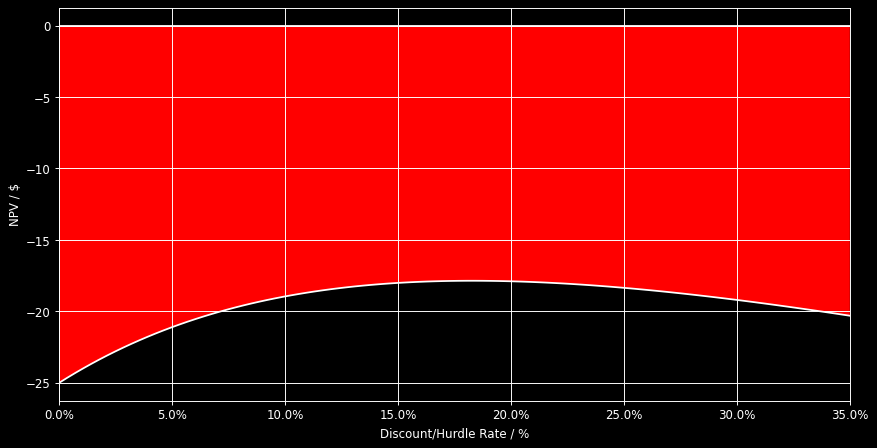

In [6]:

# plt.style.use('dark_background')
def graph_npv_profile(cf: CashFlows, max_discount=0.4):
    discounts = np.linspace(0, max_discount, 100)
    npvs = npv_profile(cf, discounts)

    fig = plt.figure(figsize=(12, 6), dpi=85)
    ax = plt.gca()

    scaled_discounts = discounts * 100
    ax.plot(scaled_discounts, npvs, color='white')
    ax.fill_between(scaled_discounts, 0, npvs, where=npvs>=0, facecolor='green')
    ax.fill_between(scaled_discounts, 0, npvs, where=npvs<=0, facecolor='red')
    
    ax.axhline(0, color='white')

    ax.xaxis.set_major_formatter(mtick.PercentFormatter())
    ax.set_xlim(0, max_discount*100)
    ax.set_xlabel('Discount/Hurdle Rate / %')
    ax.set_ylabel('NPV / $')
    ax.grid(color='white')

    

cf = np.array([-75, 50, 50, 50, -100])
graph_npv_profile(cf, 0.35)
